In [316]:
import math
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import datasets, models, layers, optimizers, utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from google.colab.patches import cv2_imshow
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [276]:
drive.mount('/content/drive')
labels_path = '/content/drive/My Drive/AI_ML/Project/Labels.csv'
images_path = '/content/drive/My Drive/AI_ML/Project/images.npy'

X = np.load(images_path)
labels_data = pd.read_csv(labels_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
X.shape

(4750, 128, 128, 3)

In [278]:
labels_data.shape

(4750, 1)

In [279]:
Y = labels_data['Label']

Label: Small-flowered Cranesbill


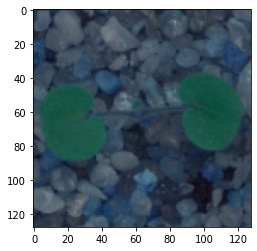

In [280]:
i = 0
image = X[i]
label = Y[i]

print(f'Label: {label}')
plt.imshow(image);

Label: Shepherds Purse


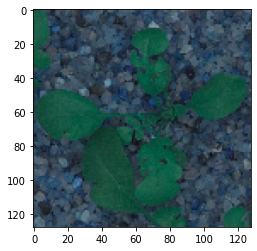

In [281]:
i = 1000
image = X[i]
label = Y[i]

print(f'Label: {label}')
plt.imshow(image);

In [282]:
# Normalize
X = X.astype('float32') / 255.0

In [283]:
for i in range(X.shape[0]):
    X[i] = cv2.GaussianBlur(X[i], (7, 7), 0)

Label: Shepherds Purse


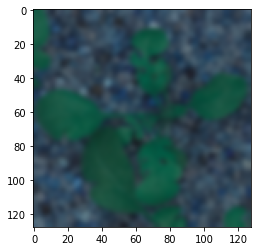

In [284]:
i = 1000
image = X[i]
label = Y[i]

print(f'Label: {label}')
plt.imshow(image);

In [285]:
enc = LabelBinarizer()
Y = enc.fit_transform(Y)

In [286]:
Y.shape

(4750, 12)

In [287]:
Y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [295]:
print(y_test.shape)
print(y_train.shape)

(1425, 12)
(3325, 12)


In [289]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [290]:
X_train.shape # Data in shape 128 x 128

(3325, 128, 128, 3)

In [300]:
model = Sequential()
model.add(Conv2D(128, (5, 5), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(GlobalMaxPooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 128, 128, 128)     9728      
_________________________________________________________________
batch_normalization_24 (Batc (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 64, 64, 256)       819456    
_________________________________________________________________
batch_normalization_25 (Batc (None, 64, 64, 256)       1024      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 32, 32, 256)      

In [301]:
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [302]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)
model_checkpoint =  ModelCheckpoint(
  'cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5', 
  monitor='val_loss', 
  verbose=1, 
  save_best_only=True, 
  save_weights_only=True, 
  mode='auto', 
  period=1
)

In [304]:
num_classes = 12
batch_size = 32
epochs = 40
num_predictions = 24

model.fit(X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_data=(X_test, y_test),
  shuffle=True,
  verbose=1,
  callbacks=[early_stopping,model_checkpoint]
)

Epoch 1/40
104/104 [==============================] - ETA: 0s - loss: 3.7346 - accuracy: 0.2749
Epoch 00001: val_loss improved from inf to 3.00555, saving model to cifar_cnn_checkpoint_01_loss3.0055.h5
104/104 [==============================] - 13s 128ms/step - loss: 3.7346 - accuracy: 0.2749 - val_loss: 3.0055 - val_accuracy: 0.1361
Epoch 2/40
104/104 [==============================] - ETA: 0s - loss: 1.5169 - accuracy: 0.4815
Epoch 00002: val_loss did not improve from 3.00555
104/104 [==============================] - 12s 116ms/step - loss: 1.5169 - accuracy: 0.4815 - val_loss: 3.6301 - val_accuracy: 0.1326
Epoch 3/40
104/104 [==============================] - ETA: 0s - loss: 1.3161 - accuracy: 0.5564
Epoch 00003: val_loss did not improve from 3.00555
104/104 [==============================] - 12s 118ms/step - loss: 1.3161 - accuracy: 0.5564 - val_loss: 3.8883 - val_accuracy: 0.0554
Epoch 4/40
104/104 [==============================] - ETA: 0s - loss: 1.1969 - accuracy: 0.5937
Epoch 

In [306]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 1s 30ms/step - loss: 1.2552 - accuracy: 0.6281
Test loss: 1.2551872730255127
Test accuracy: 0.6280701756477356


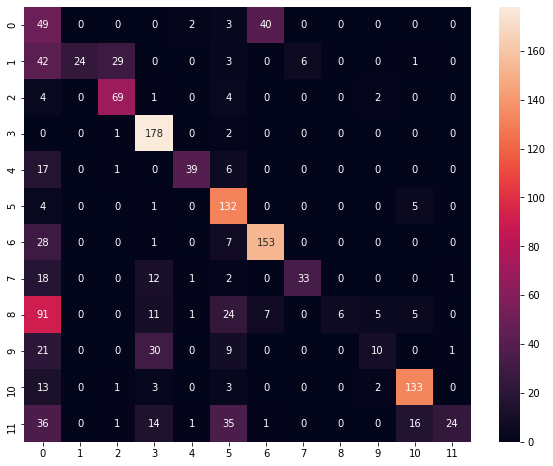

In [318]:
predictions = model.predict(X_test)
y_pred = (predictions > 0.5)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, fmt="d");

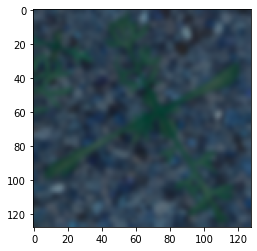

In [328]:
plt.imshow(X_test[2]);

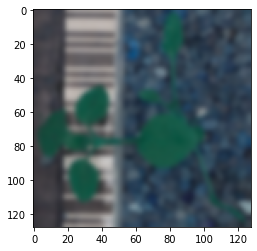

In [327]:
plt.imshow(X_test[3]);

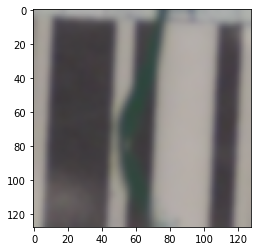

In [326]:
plt.imshow(X_test[33]);

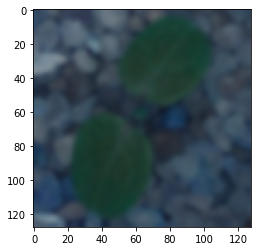

In [323]:
plt.imshow(X_test[36]);

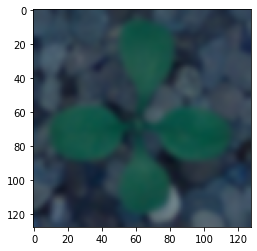

In [325]:
plt.imshow(X_test[59]);